Train shape: (1200, 81)
Test shape: (260, 80)

Train head:


,Id,PropertyClass,ZoningCategory,RoadAccessLength,LandArea,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,...,SwimmingPoolArea,PoolQuality,BoundaryFence,ExtraFacility,ExtraFacilityValue,MonthSold,YearSold,DealType,DealCondition,HotelValue
0,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000.0
1,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000.0
2,234,20,RL,75.0,10650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128200.0
3,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,275000.0
4,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872.0



Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1         1200 non-null   object 
 14  NearbyTrans

None


Missing columns (top 20):


,missing_count,missing_pct
PoolQuality,1194,99.50
ExtraFacility,1154,96.17
ServiceLaneType,1125,93.75
BoundaryFence,963,80.25
FacadeType,702,58.50
LoungeQuality,560,46.67
RoadAccessLength,223,18.58
ParkingQuality,65,5.42
ParkingFinish,65,5.42
ParkingType,65,5.42


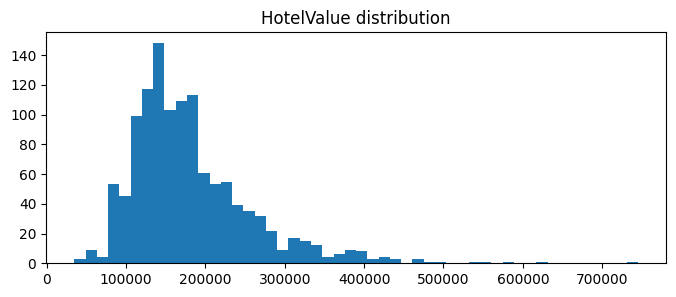

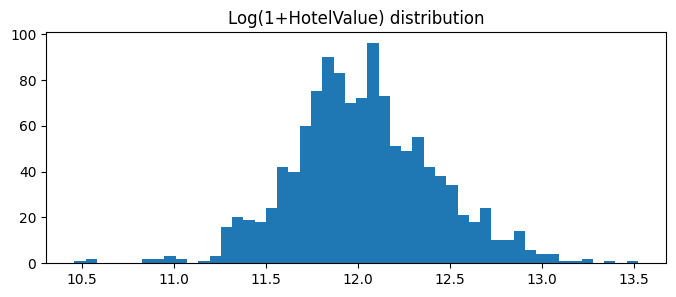

In [2]:
# Step 1: imports and initial quick EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

RND = 42

# load files (adjust path if needed)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain head:")
display(train.head())

print("\nTrain info:")
display(train.info())

# missing summary
missing = train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(train) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print("\nMissing columns (top 20):")
display(missing_df.head(20))

# target distribution
if "HotelValue" in train.columns:
    plt.figure(figsize=(8,3))
    plt.hist(train["HotelValue"].dropna(), bins=50)
    plt.title("HotelValue distribution")
    plt.show()

    plt.figure(figsize=(8,3))
    plt.hist(np.log1p(train["HotelValue"].dropna()), bins=50)
    plt.title("Log(1+HotelValue) distribution")
    plt.show()
else:
    print("Warning: HotelValue not in train")


In [3]:
train.select_dtypes(exclude=['object']).columns
len(train.select_dtypes(exclude='object').columns)
train.select_dtypes(exclude=['object']).describe().round(decimals=2)

,Id,PropertyClass,RoadAccessLength,LandArea,OverallQuality,OverallCondition,ConstructionYear,RenovationYear,FacadeArea,BasementFacilitySF1,...,TerraceArea,OpenVerandaArea,EnclosedVerandaArea,SeasonalPorchArea,ScreenPorchArea,SwimmingPoolArea,ExtraFacilityValue,MonthSold,YearSold,HotelValue
count,1200.00,1200.00,977.00,1200.00,1200.00,1200.00,1200.00,1200.00,1193.00,1200.00,...,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,733.33,57.01,70.23,10662.05,6.12,5.58,1971.31,1985.04,103.45,447.33,...,96.09,49.28,21.42,3.85,15.60,2.88,49.90,6.35,2007.82,181709.90
std,425.25,42.68,24.89,10641.84,1.37,1.11,30.59,20.70,172.34,460.47,...,129.18,69.13,61.43,31.46,56.74,41.09,545.67,2.68,1.32,77638.66
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,364.50,20.00,59.00,7589.50,5.00,5.00,1954.00,1966.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,130000.00
50%,735.50,50.00,70.00,9600.00,6.00,5.00,1973.00,1994.00,0.00,384.00,...,0.00,27.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,165000.00
75%,1105.50,70.00,80.00,11700.00,7.00,6.00,2001.00,2004.00,166.00,725.00,...,168.00,73.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,215000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1378.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,745000.00


In [4]:
train.select_dtypes(include=['object']).columns
len(train.select_dtypes(include='object').columns)
train.select_dtypes(include=['object']).describe()

,ZoningCategory,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,PlotConfiguration,LandSlope,District,NearbyTransport1,...,ParkingType,ParkingFinish,ParkingQuality,ParkingCondition,DrivewayType,PoolQuality,BoundaryFence,ExtraFacility,DealType,DealCondition
count,1200,1200,75,1200,1200,1200,1200,1200,1200,1200,...,1135,1135,1135,1135,1200,6,237,46,1200,1200
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,949,1196,45,751,1085,1199,849,1137,186,1032,...,714,492,1078,1089,1100,2,132,41,1039,988


In [5]:
target = train.HotelValue
hotelvalue_skew = target.skew().round(2)
log_hotelvalue_skew = np.log(target).skew().round(2)

print(f"HotelValue has a skew of {hotelvalue_skew}, "
      f"while the log-transformed HotelValue improves the skew to {log_hotelvalue_skew}.")

HotelValue has a skew of 1.73, while the log-transformed HotelValue improves the skew to 0.13.


In [6]:
threshold_pct = 90.0
missing_percent = train.isnull().mean() * 100
drop_cols = missing_percent[missing_percent > threshold_pct].index.tolist()
print("Dropping columns (too many missing values):", drop_cols)

train = train.drop(columns=drop_cols)
# only drop from test if present
test = test.drop(columns=[c for c in drop_cols if c in test.columns])

print("Shapes after dropping:", train.shape, test.shape)

Dropping columns (too many missing values): ['ServiceLaneType', 'PoolQuality', 'ExtraFacility']
Shapes after dropping: (1200, 78) (260, 77)


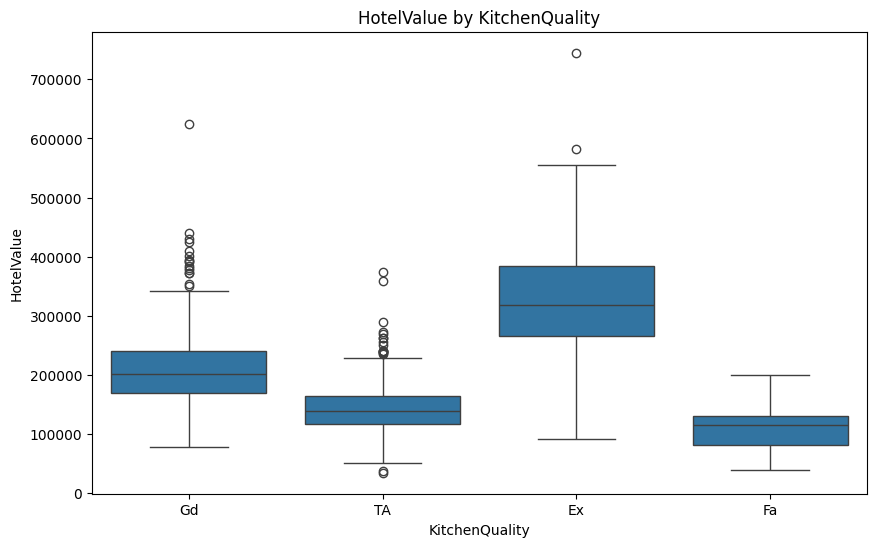

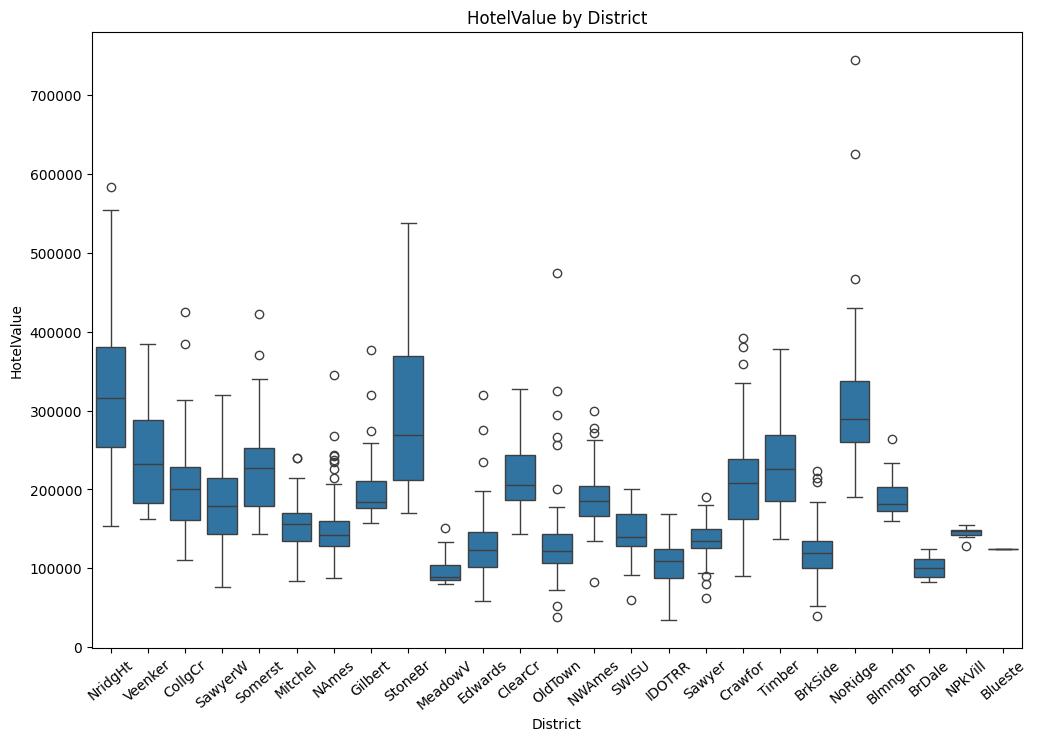

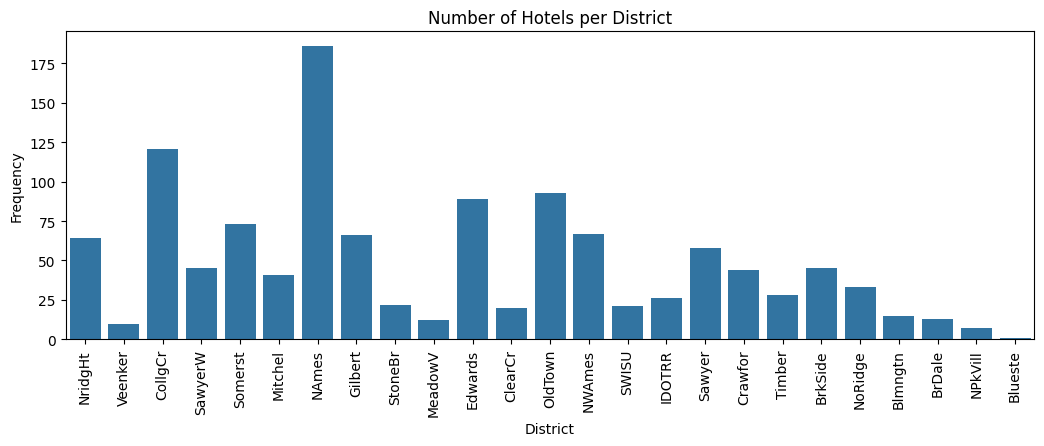

In [7]:
var = train['KitchenQuality']
plt.figure(figsize=(10,6))
sns.boxplot(x=var, y=train['HotelValue'])
plt.title('HotelValue by KitchenQuality')
plt.show()


# 3️⃣ Boxplot for District vs HotelValue
plt.figure(figsize=(12,8))
sns.boxplot(x=train['District'], y=train['HotelValue'])
plt.xticks(rotation=40)
plt.title('HotelValue by District')
plt.show()

plt.figure(figsize=(12.5,4))
sns.countplot(x='District', data=train)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Number of Hotels per District')
plt.show()

Top correlations (head):


,0
HotelValue,1.000000
OverallQuality,0.787901
UsableArea,0.694310
ParkingCapacity,0.642310
ParkingArea,0.625122
BasementTotalSF,0.604161
GroundFloorArea,0.594268
FullBaths,0.554357
TotalRooms,0.518993
ConstructionYear,0.518934


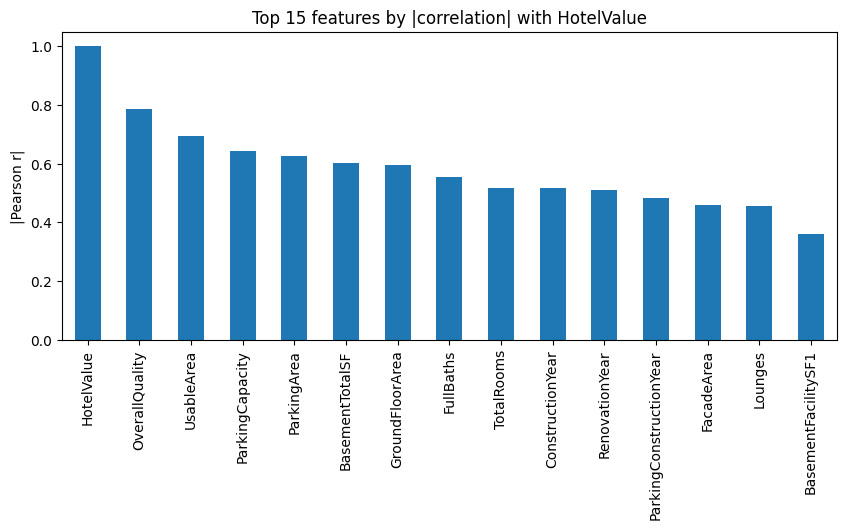

In [8]:
hotel_data_copy = train.copy()
test_clean = test.copy()

target_col = "HotelValue"
# ensure target present
assert target_col in train.columns, "HotelValue (target) not found in train_clean"

num_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# compute correlations with target (numeric only)
corr_with_target = train[num_cols].corrwith(train[target_col]).sort_values(ascending=False)
print("Top correlations (head):")
display(corr_with_target.head(20))

# plot top correlated features
plt.figure(figsize=(10,4))
corr_with_target.abs().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title("Top 15 features by |correlation| with HotelValue")
plt.ylabel("|Pearson r|")
plt.show()

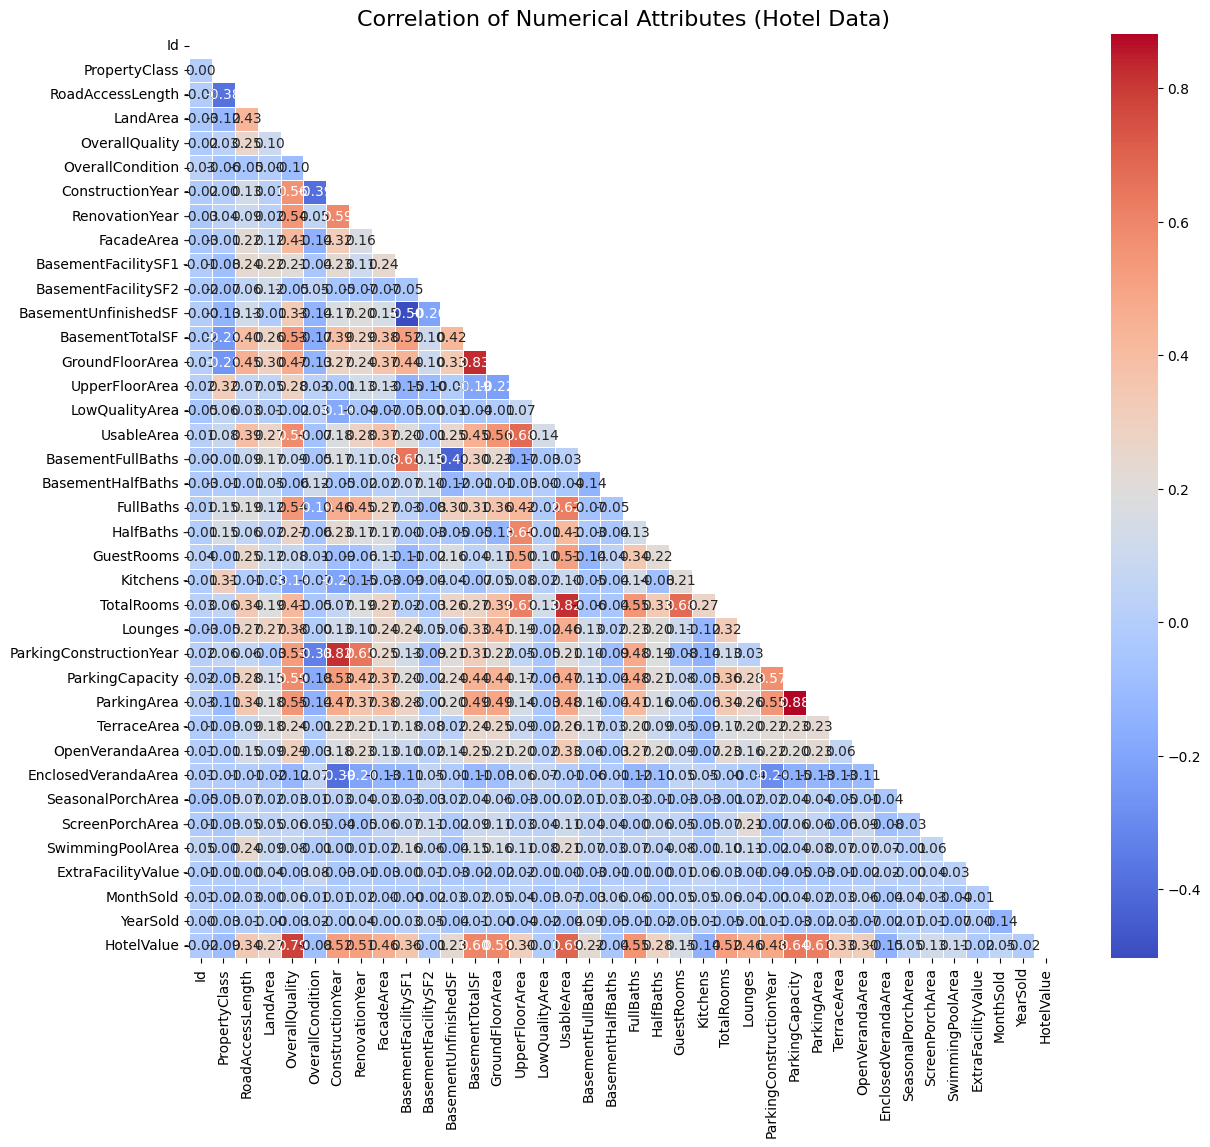

,HotelValue
HotelValue,1.000000
OverallQuality,0.787901
UsableArea,0.694310
ParkingCapacity,0.642310
ParkingArea,0.625122
BasementTotalSF,0.604161
GroundFloorArea,0.594268
FullBaths,0.554357
TotalRooms,0.518993
ConstructionYear,0.518934


In [9]:
numeric_data = train.select_dtypes(include=np.number)

correlation = numeric_data.corr()

plt.figure(figsize=(14,12))
plt.title('Correlation of Numerical Attributes (Hotel Data)', fontsize=16)

# Mask upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

# Correlation of features with HotelValue
correlation['HotelValue'].sort_values(ascending=False).head(15)


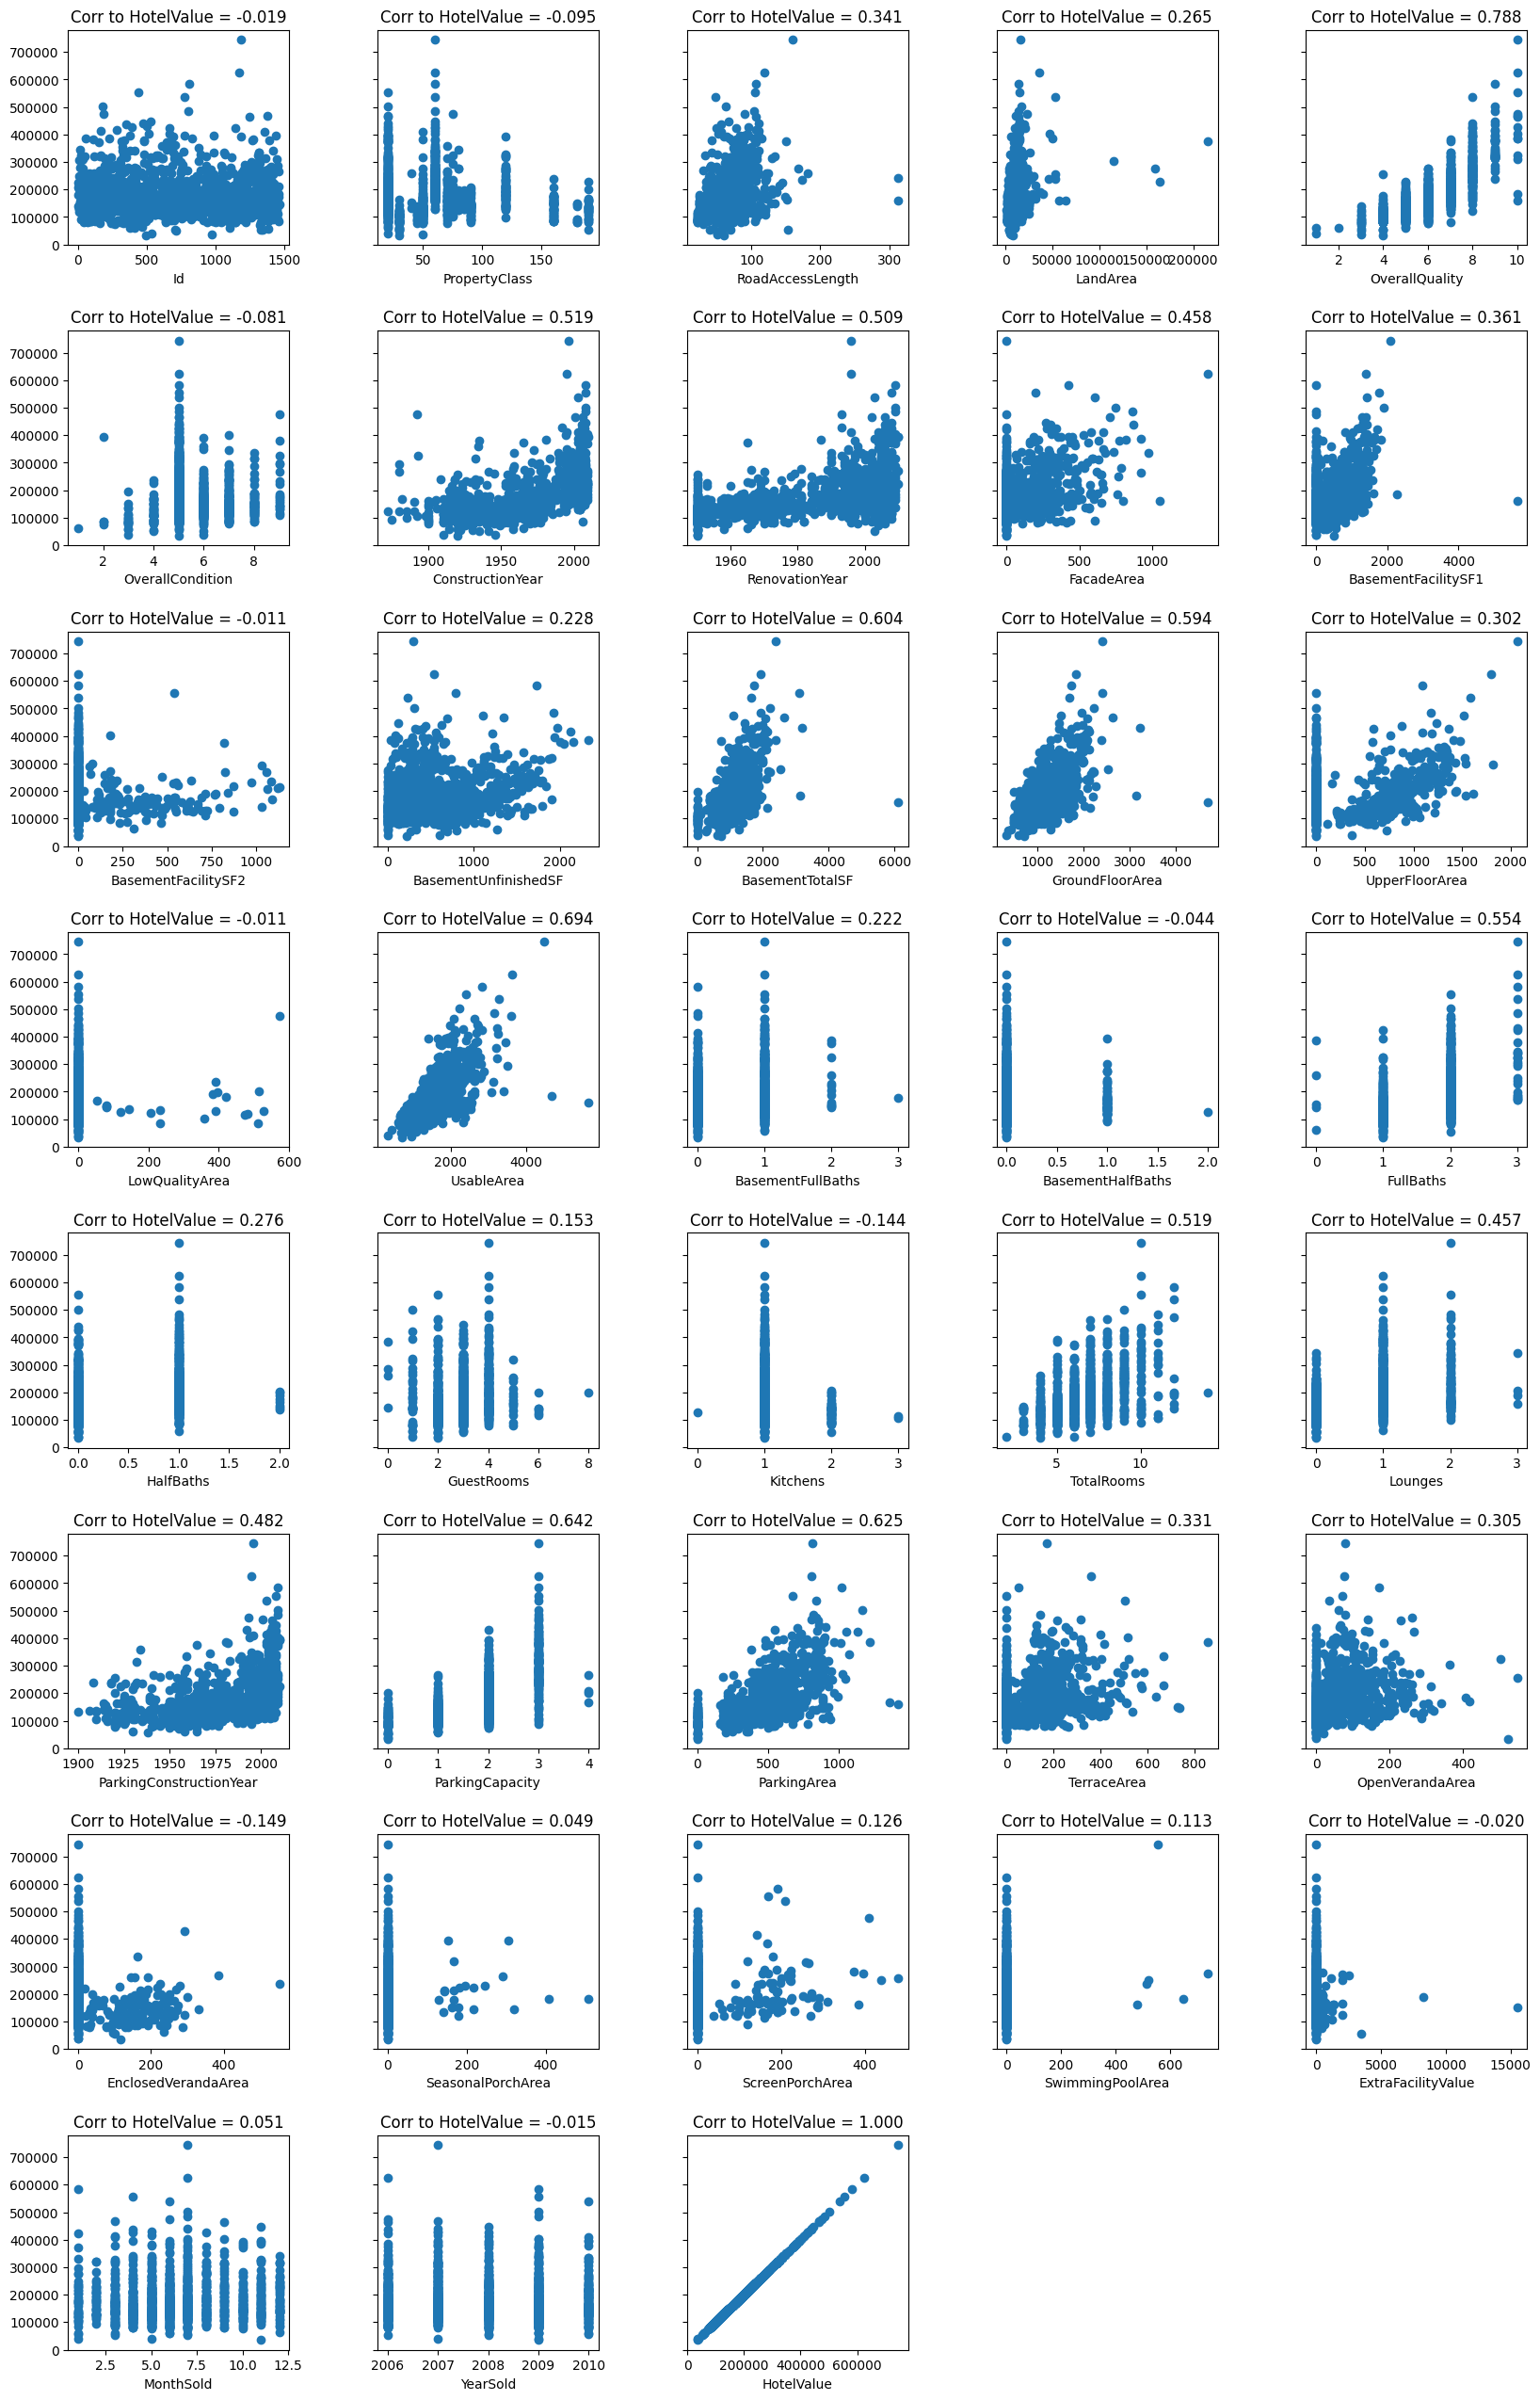

In [10]:
num_columns = train.select_dtypes(include=np.number).columns
corr_to_value = train[num_columns].corr()['HotelValue']

# Grid setup
n_cols = 5
n_rows = int(np.ceil(len(num_columns) / n_cols))

fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for j in range(n_rows):
    for i in range(n_cols):
        index = i + j*n_cols
        ax = ax_arr[j, i] if n_rows > 1 else ax_arr[i]
        if index < len(num_columns):
            ax.scatter(train[num_columns[index]], train['HotelValue'])
            ax.set_xlabel(num_columns[index])
            ax.set_title(f"Corr to HotelValue = {corr_to_value[num_columns[index]]:.3f}")
        else:
            ax.axis('off')  # hide empty subplots

plt.show()

In [11]:
cat_columns = train.select_dtypes(include='object').columns
print(cat_columns)
print(len(cat_columns))

missing_cat = train[cat_columns].isna().sum().sort_values(ascending=False)
display(missing_cat.head(17))

Index(['ZoningCategory', 'RoadType', 'PlotShape', 'LandElevation',
       'UtilityAccess', 'PlotConfiguration', 'LandSlope', 'District',
       'NearbyTransport1', 'NearbyTransport2', 'PropertyType', 'HotelStyle',
       'RoofDesign', 'RoofMaterial', 'ExteriorPrimary', 'ExteriorSecondary',
       'FacadeType', 'ExteriorQuality', 'ExteriorCondition', 'FoundationType',
       'BasementHeight', 'BasementCondition', 'BasementExposure',
       'BasementFacilityType1', 'BasementFacilityType2', 'HeatingType',
       'HeatingQuality', 'CentralAC', 'ElectricalSystem', 'KitchenQuality',
       'PropertyFunctionality', 'LoungeQuality', 'ParkingType',
       'ParkingFinish', 'ParkingQuality', 'ParkingCondition', 'DrivewayType',
       'BoundaryFence', 'DealType', 'DealCondition'],
      dtype='object')
40


,0
BoundaryFence,963
FacadeType,702
LoungeQuality,560
ParkingType,65
ParkingFinish,65
ParkingCondition,65
ParkingQuality,65
BasementExposure,30
BasementFacilityType1,29
BasementFacilityType2,29


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Dealing with missing/null values

# 1️⃣ Numerical columns
# Example: FacadeArea (equivalent to MasVnrArea)
hotel_data_copy['FacadeArea'] = hotel_data_copy['FacadeArea'].fillna(0)

# Example: RoadAccessLength (equivalent to LotFrontage)
# Fill missing values with median per District
hotel_data_copy['RoadAccessLength'] = hotel_data_copy.groupby('District')['RoadAccessLength'].transform(
    lambda x: x.fillna(x.median())
)

# 2️⃣ Categorical columns
cat_cols_fill_none = [ 'BoundaryFence',
                      'LoungeQuality', 'ParkingCondition', 'ParkingQuality', 'ParkingFinish',
                      'ParkingType', 'BasementFacilityType2', 'BasementExposure',
                      'BasementFacilityType1', 'BasementHeight', 'BasementCondition',
                      'FacadeType']

for cat in cat_cols_fill_none:
    hotel_data_copy[cat] = hotel_data_copy[cat].fillna("None")

# Check remaining missing values after imputation
hotel_data_copy.isna().sum().sort_values(ascending=False).head()

,0
ParkingConstructionYear,65
ElectricalSystem,1
ZoningCategory,0
RoadAccessLength,0
Id,0


In [13]:
# Remove outliers based on scatter plot observations against HotelValue
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['RoadAccessLength'][hotel_data_copy['RoadAccessLength'] > 200].index)
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['LandArea'][hotel_data_copy['LandArea'] > 100000].index)
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['BasementFacilitySF1'][hotel_data_copy['BasementFacilitySF1'] > 4000].index)
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['BasementTotalSF'][hotel_data_copy['BasementTotalSF'] > 6000].index)
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['GroundFloorArea'][hotel_data_copy['GroundFloorArea'] > 4000].index)
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['UsableArea'][(hotel_data_copy['UsableArea'] > 4000) & (hotel_data_copy['HotelValue'] < 300000)].index)
hotel_data_copy = hotel_data_copy.drop(hotel_data_copy['LowQualityArea'][hotel_data_copy['LowQualityArea'] > 550].index)


hotel_data_copy['HotelValue'] = np.log(hotel_data_copy['HotelValue'])
hotel_data_copy = hotel_data_copy.rename(columns={'HotelValue': 'HotelValue_log'})


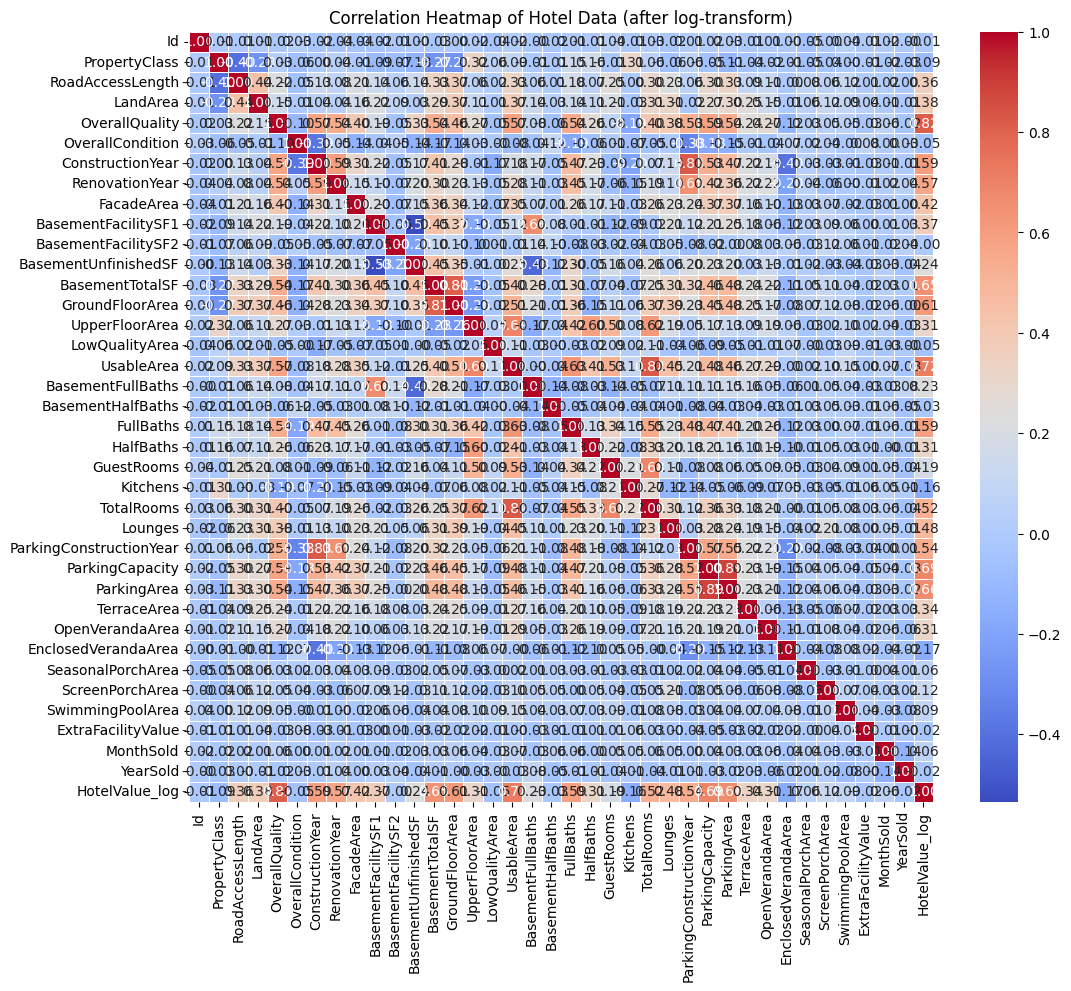

In [14]:
numeric_data = hotel_data_copy.select_dtypes(include=np.number)

# Compute correlation
transformed_corr = numeric_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Hotel Data (after log-transform)")
plt.show()

In [15]:
# Columns to drop (lowly correlated or irrelevant for modeling)
attributes_drop = ['HotelValue_log', 'ExtraFacilityValue', 'PropertyClass', 'MonthSold', 'YearSold','TotalRooms']

#'ParkingArea', 'ParkingConstructionYear', 'TotalRooms'
# Features and target
X = hotel_data_copy.drop(attributes_drop, axis=1)
y = hotel_data_copy['HotelValue_log']

# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Final imputation for any remaining missing values
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Base models dictionary ---
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.0005, random_state=5),
    "Ridge": Ridge(alpha=0.002, random_state=5),
    "ElasticNet": ElasticNet(alpha=0.02, l1_ratio=0.7, random_state=5),
    "RandomForest": RandomForestRegressor(random_state=5),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5
    ),
    "XGBoost": XGBRegressor(
        n_estimators=1000, learning_rate=0.05, random_state=5, verbosity=0
    ),
    "DecisionTree": DecisionTreeRegressor(random_state=5),
    "AdaBoost": AdaBoostRegressor(random_state=5),
    "KNeighbors": KNeighborsRegressor(),
    "SVR": SVR(),
    "BayesianRidge": BayesianRidge()
}

# --- Series to store MAE results ---
mae_compare = pd.Series(dtype=float, index=models.keys(), name="MAE")

# --- Train, predict, evaluate all base models ---
for name, model in models.items():
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
    mae_compare[name] = mae
    print(f"{name:<25} MAE: {mae:.2f}")

# -------------------------------
# Lasso + Bayesian Ridge ensemble (0.8 Lasso + 0.2 Bayesian)
lasso_model = Lasso(alpha=0.0005, random_state=5)
bayesian_model = BayesianRidge()

lasso_model.fit(train_X, train_y)
bayesian_model.fit(train_X, train_y)

lasso_preds = lasso_model.predict(val_X)
bayes_preds = bayesian_model.predict(val_X)

ensemble_preds = lasso_preds * 0.8 + bayes_preds * 0.2
mae_compare["Lasso+Bayesian_0.8_0.2"] = mean_absolute_error(inv_y(ensemble_preds), inv_y(val_y))
print(f"{'Lasso+Bayesian_0.8_0.2':<25} MAE: {mae_compare['Lasso+Bayesian_0.8_0.2']:.2f}")

# -------------------------------
# PCA-based Ridge
pca = PCA(n_components=min(train_X.shape[1], 10))  # Reduce to 10 components or less
train_X_pca = pca.fit_transform(train_X)
val_X_pca = pca.transform(val_X)

ridge_pca = Ridge(alpha=0.002, random_state=5)
ridge_pca.fit(train_X_pca, train_y)
ridge_pca_preds = ridge_pca.predict(val_X_pca)

mae_compare["Ridge+PCA"] = mean_absolute_error(inv_y(ridge_pca_preds), inv_y(val_y))
print(f"{'Ridge+PCA':<25} MAE: {mae_compare['Ridge+PCA']:.2f}")

# -------------------------------
# Display all results sorted by MAE
print("\nMAE values for all models and ensembles:")
print(mae_compare.sort_values().round(2))


LinearRegression          MAE: 14721.97
Lasso                     MAE: 12666.83
Ridge                     MAE: 14716.71
ElasticNet                MAE: 15540.74
RandomForest              MAE: 18657.07
GradientBoosting          MAE: 16822.82
XGBoost                   MAE: 17364.44
DecisionTree              MAE: 28800.26
AdaBoost                  MAE: 21999.97
KNeighbors                MAE: 33125.59
SVR                       MAE: 27462.29
BayesianRidge             MAE: 12960.28
Lasso+Bayesian_0.8_0.2    MAE: 12669.43
Ridge+PCA                 MAE: 27408.64

MAE values for all models and ensembles:
Lasso                     12666.83
Lasso+Bayesian_0.8_0.2    12669.43
BayesianRidge             12960.28
Ridge                     14716.71
LinearRegression          14721.97
ElasticNet                15540.74
GradientBoosting          16822.82
XGBoost                   17364.44
RandomForest              18657.07
AdaBoost                  21999.97
Ridge+PCA                 27408.64
SVR          

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

# Define Lasso model (same as before)
lasso_model = Lasso(alpha=0.0005, random_state=5)

# Perform 10-fold cross-validation using negative MSE
scores = cross_val_score(
    lasso_model,
    imputed_X,
    y,
    scoring='neg_mean_squared_error',
    cv=n_folds
)

# Convert negative MSE to RMSE
lasso_rmse_scores = np.sqrt(-scores)

print("For Lasso model (HotelValue_log):")
print("Mean RMSE =", lasso_rmse_scores.mean().round(3))
print("RMSE Std deviation =", lasso_rmse_scores.std().round(3))


For Lasso model (HotelValue_log):
Mean RMSE = 0.111
RMSE Std deviation = 0.013


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

# Define parameter grid for Lasso
param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()

# Perform GridSearchCV
grid_search = GridSearchCV(top_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(imputed_X, y)

# Show best parameters
grid_search.best_params_


{'alpha': 0.0007}

In [19]:
from sklearn.linear_model import LinearRegression

# 1️⃣ Define Linear Regression model
lr_model = LinearRegression()

# 2️⃣ Define possible parameter grid
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [False, True]   # Ensures coefficients are non-negative
}

# 3️⃣ Perform Grid Search with 5-fold CV
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# 4️⃣ Fit model
grid_search_lr.fit(imputed_X, y)

# 5️⃣ Display results
print("Best Parameters (Linear Regression):", grid_search_lr.best_params_)
print("Best Score (Negative MSE):", grid_search_lr.best_score_)


Best Parameters (Linear Regression): {'fit_intercept': True, 'positive': False}
Best Score (Negative MSE): -0.015274998847824156


In [20]:
# Copy test data
test_X = test.copy()

# Fill missing numerical values
if 'FacadeArea' in test_X.columns:
    test_X['FacadeArea'] = test_X['FacadeArea'].fillna(0)

# Fill missing categorical values — only columns that exist in the test set
cat_cols_fill_none = ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                      'ParkingCondition', 'ParkingQuality', 'ParkingFinish', 'ParkingType',
                      'BasementFacilityType2', 'BasementExposure', 'BasementFacilityType1',
                      'BasementHeight', 'BasementCondition', 'FacadeType']
#'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','ParkingCondition', 'ParkingQuality', 'ParkingFinish', 'ParkingType','BasementFacilityType2', 'BasementExposure', 'BasementFacilityType1','BasementHeight', 'BasementCondition', 'FacadeType'

existing_cat_cols = [col for col in cat_cols_fill_none if col in test_X.columns]

for cat in existing_cat_cols:
    test_X[cat] = test_X[cat].fillna("None")

# Drop the same attributes as in training data (except target)
attributes_drop_mod = [col for col in attributes_drop if col != 'HotelValue_log']
existing_drop_cols = [col for col in attributes_drop_mod if col in test_X.columns]
test_X = test_X.drop(existing_drop_cols, axis=1)

# One-hot encoding for categorical data
test_X = pd.get_dummies(test_X)

# Align test data columns with training data
final_train, final_test = X.align(test_X, join='left', axis=1)

# Impute remaining missing values in test set
final_test_imputed = my_imputer.transform(final_test)


In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

# -----------------------
# Helper: inverse log-transform
# -----------------------
def inv_y(transformed_y):
    return np.exp(transformed_y)

# -----------------------
# Impute missing values
# -----------------------
my_imputer = SimpleImputer()
X_imputed = my_imputer.fit_transform(final_train)
y_array = np.array(y)

# -----------------------
# Define models and search space
# -----------------------
alphas = [0.00001, 0.00002, 0.0005, 0.001, 0.005, 0.01]
weights = np.arange(0.0, 1.05, 0.05)  # Bayesian weight: 0.0 → 1.0

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_mae = float('inf')
best_alpha = None
best_weight = None

# -----------------------
# Grid Search with K-Fold
# -----------------------
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    bayes_model = BayesianRidge()

    fold_maes = []

    for train_idx, val_idx in kf.split(X_imputed):
        X_train, X_val = X_imputed[train_idx], X_imputed[val_idx]
        y_train, y_val = y_array[train_idx], y_array[val_idx]

        # Fit both models
        ridge_model.fit(X_train, y_train)
        bayes_model.fit(X_train, y_train)

        # Predictions
        pred_ridge = ridge_model.predict(X_val)
        pred_bayes = bayes_model.predict(X_val)

        for w in weights:
            ensemble_pred = pred_bayes * w + pred_ridge * (1 - w)
            mae = mean_absolute_error(inv_y(y_val), inv_y(ensemble_pred))
            fold_maes.append((w, mae))

    # Compute mean MAE per weight
    weight_mae = {}
    for w, mae in fold_maes:
        weight_mae.setdefault(w, []).append(mae)

    avg_mae_per_weight = {w: np.mean(m) for w, m in weight_mae.items()}
    min_w = min(avg_mae_per_weight, key=avg_mae_per_weight.get)

    if avg_mae_per_weight[min_w] < best_mae:
        best_mae = avg_mae_per_weight[min_w]
        best_alpha = alpha
        best_weight = min_w

# -----------------------
# Print final best results
# -----------------------
print("✅ Best Ensemble Configuration Found:")
print(f"Best Ridge alpha       : {best_alpha}")
print(f"Best Bayesian weight   : {best_weight:.2f} (Ridge weight = {1 - best_weight:.2f})")
print(f"Best Cross-Validation MAE : {best_mae:.2f}")


✅ Best Ensemble Configuration Found:
Best Ridge alpha       : 0.01
Best Bayesian weight   : 0.85 (Ridge weight = 0.15)
Best Cross-Validation MAE : 13155.99


In [22]:
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Create final model
final_model = Lasso(alpha=0.0, random_state=5)

# Impute missing values on the full training set
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model on the full training data
final_model.fit(final_train_imputed, y)
# Make predictions on the test set
test_preds = final_model.predict(final_test_imputed)

# Convert predictions back from log scale to original scale
output = pd.DataFrame({
    'Id': test.Id,
    'HotelValue': inv_y(test_preds)
})

# Save to CSV
output.to_csv('submission.csv', index=False)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.536e+00, tolerance: 1.815e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [23]:
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# --- Function to inverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values on full training and test sets ---
my_imputer = SimpleImputer()
final_train_imputed = my_imputer.fit_transform(final_train)
final_test_imputed = my_imputer.transform(final_test)

# --- Define individual models ---
lasso_final = Lasso(alpha=0.0, random_state=5)
bayesian_final = BayesianRidge()

# --- Fit both models on full training data ---
lasso_final.fit(final_train_imputed, y)
bayesian_final.fit(final_train_imputed, y)

# --- Predict on test set ---
pred_lasso = lasso_final.predict(final_test_imputed)
pred_bayes = bayesian_final.predict(final_test_imputed)

# --- Ensemble: 80% Lasso + 20% Bayesian Ridge ---
w_lasso = 0.8
w_bayes = 0.2
ensemble_preds = pred_lasso * w_lasso + pred_bayes * w_bayes

# --- Create output dataframe ---
output = pd.DataFrame({
    'Id': test.Id,
    'HotelValue': inv_y(ensemble_preds)
})

# --- Save to CSV ---
output.to_csv("submission_lasso_bayesian_0.8_0.2.csv", index=False)
print("✅ Saved: submission_lasso_bayesian_0.8_0.2.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


✅ Saved: submission_lasso_bayesian_0.8_0.2.csv


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.536e+00, tolerance: 1.815e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

# --- Inverse transform (since target was log-transformed) ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values for train and validation ---
my_imputer = SimpleImputer()
train_X_imputed = my_imputer.fit_transform(train_X)
val_X_imputed = my_imputer.transform(val_X)

train_y_array = np.array(train_y)
val_y_array = np.array(val_y)

# --- Search ranges ---
ridge_alphas = [1e-6, 1e-5, 1e-4, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
bayesian_weights = np.arange(0, 1.05, 0.05)  # 0.0 → 1.0 in steps of 0.05

# --- Initialize models ---
ridge_model = Ridge(random_state=5)
bayesian_model = BayesianRidge()

best_mae = float('inf')
best_alpha = None
best_weight = None

# --- Grid Search ---
for alpha in ridge_alphas:
    ridge_model.set_params(alpha=alpha)
    ridge_model.fit(train_X_imputed, train_y_array)
    bayesian_model.fit(train_X_imputed, train_y_array)

    ridge_preds = ridge_model.predict(val_X_imputed)
    bayes_preds = bayesian_model.predict(val_X_imputed)

    for w in bayesian_weights:
        ensemble_preds = bayes_preds * w + ridge_preds * (1 - w)
        mae = mean_absolute_error(inv_y(val_y_array), inv_y(ensemble_preds))

        if mae < best_mae:
            best_mae = mae
            best_alpha = alpha
            best_weight = w

print("✅ Best results for Bayesian Ridge + Ridge ensemble:")
print(f"🔹 Best Ridge alpha: {best_alpha}")
print(f"🔹 Best Bayesian Ridge weight: {best_weight}")
print(f"🔹 Validation MAE: {best_mae:.2f}")


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.49982e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


✅ Best results for Bayesian Ridge + Ridge ensemble:
🔹 Best Ridge alpha: 0.02
🔹 Best Bayesian Ridge weight: 0.75
🔹 Validation MAE: 12735.67


In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Define individual models ---
lasso_model = Lasso(alpha=0.0005, random_state=5)
ridge_model = Ridge(alpha=0.002, random_state=5)
elastic_model = ElasticNet(alpha=0.02, l1_ratio=0.7, random_state=5)

# --- Fit models on training data ---
lasso_model.fit(train_X, train_y)
ridge_model.fit(train_X, train_y)
elastic_model.fit(train_X, train_y)

# --- Predictions on validation set ---
pred_lasso = lasso_model.predict(val_X)
pred_ridge = ridge_model.predict(val_X)
pred_elastic = elastic_model.predict(val_X)

# --- Weight combinations for 3 models (sum=1) ---
weight_combinations = [
    [0.6, 0.2, 0.2], [0.5, 0.3, 0.2], [0.5, 0.25, 0.25], [0.4, 0.3, 0.3],
    [0.7, 0.15, 0.15], [0.65, 0.2, 0.15], [0.6, 0.25, 0.15], [0.55, 0.3, 0.15],
    [0.5, 0.35, 0.15], [0.45, 0.3, 0.25], [0.4, 0.35, 0.25], [0.35, 0.4, 0.25],
    [0.3, 0.45, 0.25], [0.3, 0.4, 0.3], [0.25, 0.45, 0.3], [0.2, 0.4, 0.4]
]

# --- Evaluate MAE for all combinations ---
ensemble_results = []

for w in weight_combinations:
    w_lasso, w_ridge, w_elastic = w
    ensemble_pred = (
        pred_lasso * w_lasso +
        pred_ridge * w_ridge +
        pred_elastic * w_elastic
    )
    mae = mean_absolute_error(inv_y(ensemble_pred), inv_y(val_y))
    ensemble_results.append({
        'w_lasso': w_lasso,
        'w_ridge': w_ridge,
        'w_elastic': w_elastic,
        'MAE': mae
    })

# Convert to DataFrame
ensemble_results_df = pd.DataFrame(ensemble_results).sort_values(by='MAE').reset_index(drop=True)

print("\nEnsemble MAE for different weight combinations (Lasso + Ridge + ElasticNet):")
print(ensemble_results_df.round(2))



Ensemble MAE for different weight combinations (Lasso + Ridge + ElasticNet):
    w_lasso  w_ridge  w_elastic       MAE
0      0.60     0.25       0.15  12469.88
1      0.65     0.20       0.15  12476.59
2      0.70     0.15       0.15  12496.32
3      0.50     0.30       0.20  12501.32
4      0.55     0.30       0.15  12507.97
5      0.60     0.20       0.20  12511.56
6      0.45     0.30       0.25  12535.58
7      0.50     0.25       0.25  12540.55
8      0.40     0.35       0.25  12563.69
9      0.50     0.35       0.15  12591.65
10     0.40     0.30       0.30  12597.52
11     0.35     0.40       0.25  12647.98
12     0.30     0.40       0.30  12658.98
13     0.30     0.45       0.25  12742.54
14     0.25     0.45       0.30  12747.81
15     0.20     0.40       0.40  12786.98


In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.impute import SimpleImputer

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values on full training and test sets ---
my_imputer = SimpleImputer()
final_train_imputed = my_imputer.fit_transform(final_train)
final_test_imputed = my_imputer.transform(final_test)

# --- Define individual models ---
lasso_model = Lasso(alpha=0.0005, random_state=5)
ridge_model = Ridge(alpha=0.002, random_state=5)
elastic_model = ElasticNet(alpha=0.02, l1_ratio=0.7, random_state=5)

# --- Fit models on full training data ---
lasso_model.fit(final_train_imputed, y)
ridge_model.fit(final_train_imputed, y)
elastic_model.fit(final_train_imputed, y)

# --- Predictions on test set ---
pred_lasso = lasso_model.predict(final_test_imputed)
pred_ridge = ridge_model.predict(final_test_imputed)
pred_elastic = elastic_model.predict(final_test_imputed)

# --- Final ensemble using best weights ---
w_lasso = 0.60
w_ridge = 0.25
w_elastic = 0.15

final_preds = (
    pred_lasso * w_lasso +
    pred_ridge * w_ridge +
    pred_elastic * w_elastic
)

# --- Prepare submission ---
output = pd.DataFrame({
    'Id': test.Id,        # replace 'test.Id' with your test ID column
    'HotelValue': inv_y(final_preds)
})

output.to_csv('submission_final_ensemble.csv', index=False)
print("✅ Saved: submission_final_ensemble.csv")


✅ Saved: submission_final_ensemble.csv


In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values ---
my_imputer = SimpleImputer()
final_train_imputed = my_imputer.fit_transform(final_train)
final_test_imputed = my_imputer.transform(final_test)
val_X_imputed = my_imputer.transform(val_X)   # for validation
val_y_true = val_y                            # assuming log-transformed y

# --- Define base models ---
ridge_model = Ridge(alpha=0.00002, random_state=5)
lasso_model = Lasso(alpha=0.0005, random_state=5)

# --- Fit models ---
ridge_model.fit(final_train_imputed, y)
lasso_model.fit(final_train_imputed, y)

# --- Predictions ---
ridge_val = ridge_model.predict(val_X_imputed)
lasso_val = lasso_model.predict(val_X_imputed)
ridge_test = ridge_model.predict(final_test_imputed)
lasso_test = lasso_model.predict(final_test_imputed)

# --- Weight combinations ---
weight_combinations = np.linspace(0.05, 0.95, 19)  # 0.05 to 0.95 step 0.05

results = []

print("\n🔹 Testing Ridge + Lasso combinations...")

# --- Test all Ridge-Lasso combinations ---
for w_ridge in weight_combinations:
    w_lasso = 1 - w_ridge

    # Validation prediction
    val_pred = ridge_val * w_ridge + lasso_val * w_lasso
    mae = mean_absolute_error(inv_y(val_y_true), inv_y(val_pred))

    # Save to results
    results.append({
        'w_ridge': round(w_ridge, 2),
        'w_lasso': round(w_lasso, 2),
        'MAE': mae
    })

    # Generate test predictions and save to CSV
    test_pred = ridge_test * w_ridge + lasso_test * w_lasso
    output_df = pd.DataFrame({
        'Id': test.Id,
        'HotelValue': inv_y(test_pred)
    })
    filename = f"submission_ridge{int(w_ridge*100)}_lasso{int(w_lasso*100)}.csv"
    output_df.to_csv(filename, index=False)

    print(f"✅ Saved {filename} (Ridge={w_ridge}, Lasso={w_lasso}, MAE={mae:.2f})")

# --- Find best combo ---
results_df = pd.DataFrame(results).sort_values(by='MAE').reset_index(drop=True)
best_combo = results_df.iloc[0]

# --- Display best weights ---
print("\n🏆 Best Ridge+Lasso Combination:")
print(f"Ridge Weight = {best_combo['w_ridge']}")
print(f"Lasso Weight = {best_combo['w_lasso']}")
print(f"Validation MAE = {best_combo['MAE']:.2f}")

# --- Save final best model predictions ---
best_test_pred = ridge_test * best_combo['w_ridge'] + lasso_test * best_combo['w_lasso']
best_output = pd.DataFrame({
    'Id': test.Id,
    'HotelValue': inv_y(best_test_pred)
})
best_output.to_csv('submission_best_ridge_lasso.csv', index=False)

print("\n✅ Saved: submission_best_ridge_lasso.csv")



🔹 Testing Ridge + Lasso combinations...
✅ Saved submission_ridge5_lasso95.csv (Ridge=0.05, Lasso=0.95, MAE=11056.30)
✅ Saved submission_ridge10_lasso90.csv (Ridge=0.1, Lasso=0.9, MAE=10934.18)
✅ Saved submission_ridge15_lasso85.csv (Ridge=0.15, Lasso=0.85, MAE=10830.82)
✅ Saved submission_ridge20_lasso80.csv (Ridge=0.2, Lasso=0.8, MAE=10737.21)
✅ Saved submission_ridge25_lasso75.csv (Ridge=0.25, Lasso=0.75, MAE=10645.86)
✅ Saved submission_ridge30_lasso70.csv (Ridge=0.3, Lasso=0.7, MAE=10561.47)
✅ Saved submission_ridge35_lasso65.csv (Ridge=0.35, Lasso=0.65, MAE=10496.99)
✅ Saved submission_ridge40_lasso60.csv (Ridge=0.39999999999999997, Lasso=0.6000000000000001, MAE=10445.65)
✅ Saved submission_ridge44_lasso55.csv (Ridge=0.44999999999999996, Lasso=0.55, MAE=10406.57)
✅ Saved submission_ridge49_lasso50.csv (Ridge=0.49999999999999994, Lasso=0.5, MAE=10374.97)
✅ Saved submission_ridge54_lasso45.csv (Ridge=0.5499999999999999, Lasso=0.45000000000000007, MAE=10345.02)
✅ Saved submission_ri

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.impute import SimpleImputer

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values ---
my_imputer = SimpleImputer()
final_train_imputed = my_imputer.fit_transform(final_train)
final_test_imputed = my_imputer.transform(final_test)

# --- Define models ---
ridge_model = Ridge(alpha=0.00002, random_state=5)
lasso_model = Lasso(alpha=0.0005, random_state=5)

# --- Train models ---
ridge_model.fit(final_train_imputed, y)
lasso_model.fit(final_train_imputed, y)

# --- Predictions on test data ---
ridge_preds = ridge_model.predict(final_test_imputed)
lasso_preds = lasso_model.predict(final_test_imputed)

# --- Weighted ensemble (67% Ridge + 33% Lasso) ---
w_ridge = 0.67
w_lasso = 0.33
final_preds = ridge_preds * w_ridge + lasso_preds * w_lasso

# --- Reverse log-transform and prepare submission ---
output = pd.DataFrame({
    'Id': test.Id,  # replace with correct test ID column
    'HotelValue': inv_y(final_preds)
})

output.to_csv('submission_ridge67_lasso33.csv', index=False)
print("✅ Saved: submission_ridge67_lasso33.csv (Ridge=0.67, Lasso=0.33)")


✅ Saved: submission_ridge67_lasso33.csv (Ridge=0.67, Lasso=0.33)


In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values ---
my_imputer = SimpleImputer()
final_train_imputed = my_imputer.fit_transform(final_train)
final_test_imputed = my_imputer.transform(final_test)
val_X_imputed = my_imputer.transform(val_X)
val_y_true = val_y  # assuming log-transformed y

# --- Define base models ---
lasso_model = Lasso(alpha=0.0005, random_state=5)
ridge_model = Ridge(alpha=0.00002, random_state=5)
bayesian_model = BayesianRidge()

# --- Fit models ---
lasso_model.fit(final_train_imputed, y)
ridge_model.fit(final_train_imputed, y)
bayesian_model.fit(final_train_imputed, y)

# --- Predictions ---
lasso_val = lasso_model.predict(val_X_imputed)
ridge_val = ridge_model.predict(val_X_imputed)
bayesian_val = bayesian_model.predict(val_X_imputed)

lasso_test = lasso_model.predict(final_test_imputed)
ridge_test = ridge_model.predict(final_test_imputed)
bayesian_test = bayesian_model.predict(final_test_imputed)

# --- Generate combinations of weights ---
weights = np.arange(0.05, 1.0, 0.05)
results = []

print("\n🔹 Testing all (Lasso, Ridge, BayesianRidge) combinations...")

for w_lasso in weights:
    for w_ridge in weights:
        w_bayes = 1 - (w_lasso + w_ridge)

        # Ensure all weights are positive and sum ≤ 1
        if w_bayes < 0 or w_bayes > 1:
            continue

        # Validation prediction
        val_pred = (lasso_val * w_lasso +
                    ridge_val * w_ridge +
                    bayesian_val * w_bayes)

        mae = mean_absolute_error(inv_y(val_y_true), inv_y(val_pred))

        results.append({
            'w_lasso': round(w_lasso, 2),
            'w_ridge': round(w_ridge, 2),
            'w_bayes': round(w_bayes, 2),
            'MAE': mae
        })

        # Test prediction
        test_pred = (lasso_test * w_lasso +
                     ridge_test * w_ridge +
                     bayesian_test * w_bayes)

        output_df = pd.DataFrame({
            'Id': test.Id,
            'HotelValue': inv_y(test_pred)
        })

        filename = f"**lasso{int(w_lasso*100)}_ridge{int(w_ridge*100)}_bayes{int(w_bayes*100)}.csv"
        output_df.to_csv(filename, index=False)

        print(f"✅ Saved {filename} (Lasso={w_lasso}, Ridge={w_ridge}, Bayes={w_bayes}, MAE={mae:.2f})")

# --- Find best combo ---
results_df = pd.DataFrame(results).sort_values(by='MAE').reset_index(drop=True)
best_combo = results_df.iloc[0]

# --- Display best weights ---
print("\n🏆 Best Lasso+Ridge+BayesianRidge Combination:")
print(f"Lasso Weight = {best_combo['w_lasso']}")
print(f"Ridge Weight = {best_combo['w_ridge']}")
print(f"BayesianRidge Weight = {best_combo['w_bayes']}")
print(f"Validation MAE = {best_combo['MAE']:.2f}")

# --- Save final best model predictions ---
best_test_pred = (lasso_test * best_combo['w_lasso'] +
                  ridge_test * best_combo['w_ridge'] +
                  bayesian_test * best_combo['w_bayes'])

best_output = pd.DataFrame({
    'Id': test.Id,
    'HotelValue': inv_y(best_test_pred)
})

best_output.to_csv("**best_combo.csv", index=False)

print("\n✅ Saved: **best_combo.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



🔹 Testing all (Lasso, Ridge, BayesianRidge) combinations...
✅ Saved **lasso5_ridge5_bayes90.csv (Lasso=0.05, Ridge=0.05, Bayes=0.9, MAE=10952.23)
✅ Saved **lasso5_ridge10_bayes85.csv (Lasso=0.05, Ridge=0.1, Bayes=0.85, MAE=10849.68)
✅ Saved **lasso5_ridge15_bayes80.csv (Lasso=0.05, Ridge=0.15000000000000002, Bayes=0.8, MAE=10758.84)
✅ Saved **lasso5_ridge20_bayes75.csv (Lasso=0.05, Ridge=0.2, Bayes=0.75, MAE=10687.69)
✅ Saved **lasso5_ridge25_bayes70.csv (Lasso=0.05, Ridge=0.25, Bayes=0.7, MAE=10620.64)
✅ Saved **lasso5_ridge30_bayes65.csv (Lasso=0.05, Ridge=0.3, Bayes=0.65, MAE=10553.98)
✅ Saved **lasso5_ridge35_bayes60.csv (Lasso=0.05, Ridge=0.35000000000000003, Bayes=0.6, MAE=10487.27)
✅ Saved **lasso5_ridge40_bayes55.csv (Lasso=0.05, Ridge=0.4, Bayes=0.55, MAE=10424.17)
✅ Saved **lasso5_ridge45_bayes50.csv (Lasso=0.05, Ridge=0.45, Bayes=0.5, MAE=10370.46)
✅ Saved **lasso5_ridge50_bayes44.csv (Lasso=0.05, Ridge=0.5, Bayes=0.44999999999999996, MAE=10336.06)
✅ Saved **lasso5_ridge55_

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# --- Function to reverse log-transform ---
def inv_y(transformed_y):
    return np.exp(transformed_y)

# --- Impute missing values ---
my_imputer = SimpleImputer()
final_train_imputed = my_imputer.fit_transform(final_train)
final_test_imputed = my_imputer.transform(final_test)
val_X_imputed = my_imputer.transform(val_X)
val_y_true = val_y   # assuming y is log-transformed

# --- Define models ---
lasso_model = Lasso(alpha=0.0005, random_state=5)
elastic_model = ElasticNet(alpha=0.0002, l1_ratio=0.5, random_state=5)

# --- Fit models ---
lasso_model.fit(final_train_imputed, y)
elastic_model.fit(final_train_imputed, y)

# --- Predictions ---
lasso_val = lasso_model.predict(val_X_imputed)
elastic_val = elastic_model.predict(val_X_imputed)

lasso_test = lasso_model.predict(final_test_imputed)
elastic_test = elastic_model.predict(final_test_imputed)

# --- Define 5 weight combinations ---
weight_combos = [
    (0.8, 0.2),
    (0.6, 0.4),
    (0.5, 0.5),
    (0.4, 0.6),
    (0.2, 0.8)
]

results = []

print("\n🔹 Testing 5 Lasso + ElasticNet combinations...\n")

for (w_lasso, w_elastic) in weight_combos:
    # Combine validation predictions
    val_pred = lasso_val * w_lasso + elastic_val * w_elastic
    mae = mean_absolute_error(inv_y(val_y_true), inv_y(val_pred))

    # Store result
    results.append({
        'w_lasso': w_lasso,
        'w_elastic': w_elastic,
        'MAE': mae
    })

    # Generate and save test predictions
    test_pred = lasso_test * w_lasso + elastic_test * w_elastic
    output_df = pd.DataFrame({
        'Id': test.Id,
        'HotelValue': inv_y(test_pred)
    })

    filename = f"**lasso{int(w_lasso*100)}_elastic{int(w_elastic*100)}.csv"
    output_df.to_csv(filename, index=False)
    print(f"✅ Saved {filename} (Lasso={w_lasso}, ElasticNet={w_elastic}, MAE={mae:.2f})")

# --- Find best combination ---
results_df = pd.DataFrame(results).sort_values(by='MAE').reset_index(drop=True)
best_combo = results_df.iloc[0]

print("\n🏆 Best Lasso + ElasticNet Combination:")
print(f"Lasso Weight = {best_combo['w_lasso']}")
print(f"ElasticNet Weight = {best_combo['w_elastic']}")
print(f"Validation MAE = {best_combo['MAE']:.2f}")

# --- Save final best model predictions ---
best_test_pred = (lasso_test * best_combo['w_lasso'] +
                  elastic_test * best_combo['w_elastic'])

best_output = pd.DataFrame({
    'Id': test.Id,
    'HotelValue': inv_y(best_test_pred)
})

best_output.to_csv("**best_lasso_elastic.csv", index=False)
print("\n✅ Saved: **best_lasso_elastic.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



🔹 Testing 5 Lasso + ElasticNet combinations...

✅ Saved **lasso80_elastic20.csv (Lasso=0.8, ElasticNet=0.2, MAE=10932.97)
✅ Saved **lasso60_elastic40.csv (Lasso=0.6, ElasticNet=0.4, MAE=10760.24)
✅ Saved **lasso50_elastic50.csv (Lasso=0.5, ElasticNet=0.5, MAE=10684.53)
✅ Saved **lasso40_elastic60.csv (Lasso=0.4, ElasticNet=0.6, MAE=10647.48)
✅ Saved **lasso20_elastic80.csv (Lasso=0.2, ElasticNet=0.8, MAE=10630.05)

🏆 Best Lasso + ElasticNet Combination:
Lasso Weight = 0.2
ElasticNet Weight = 0.8
Validation MAE = 10630.05

✅ Saved: **best_lasso_elastic.csv


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

final_train, y = final_train.align(y, join='inner', axis=0)

# Double-check shapes
print(final_train.shape, y.shape)

# Impute missing values again after alignment
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model
final_model.fit(final_train_imputed, y)

# Predict on test data
test_preds = final_model.predict(final_test_imputed)

# Convert predictions back from log scale to original scale
output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})

output.to_csv('submission_gradient_boosting.csv', index=False)
print("✅ Submission file saved successfully!")


(1192, 283) (1192,)
✅ Submission file saved successfully!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)


In [41]:
from xgboost import XGBRegressor

final_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit and predict
final_model.fit(final_train_imputed, y)
test_preds = final_model.predict(final_test_imputed)

# Save output
output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})
output.to_csv('submission_xgboost.csv', index=False)
print("✅ submission_xgboost.csv saved!")


✅ submission_xgboost.csv saved!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)


In [42]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

final_model.fit(final_train_imputed, y)
test_preds = final_model.predict(final_test_imputed)

output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})
output.to_csv('submission_random_forest.csv', index=False)
print("✅ submission_random_forest.csv saved!")


✅ submission_random_forest.csv saved!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)


In [43]:
from sklearn.ensemble import AdaBoostRegressor

final_model = AdaBoostRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

final_model.fit(final_train_imputed, y)
test_preds = final_model.predict(final_test_imputed)

output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})
output.to_csv('submission_adaboost.csv', index=False)
print("✅ submission_adaboost.csv saved!")


✅ submission_adaboost.csv saved!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)


In [44]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

final_model = Pipeline([
    ('pca', PCA(n_components=30, random_state=42)),
    ('ridge', Ridge(alpha=1.0, random_state=42))
])

final_model.fit(final_train_imputed, y)
test_preds = final_model.predict(final_test_imputed)

output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})
output.to_csv('submission_ridge_pca.csv', index=False)
print("✅ submission_ridge_pca.csv saved!")


✅ submission_ridge_pca.csv saved!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)


In [48]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_train_scaled = scaler.fit_transform(final_train_imputed)
final_test_scaled = scaler.transform(final_test_imputed)

final_model = SVR(kernel='rbf', C=100, epsilon=0.1)
final_model.fit(final_train_scaled, y)
test_preds = final_model.predict(final_test_scaled)

output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': (test_preds)
})
output.to_csv('submission_svr.csv', index=False)
print("✅ submission_svr.csv saved!")


✅ submission_svr.csv saved!


In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, BayesianRidge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

# -------------------- LOAD & PREPROCESS --------------------
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Drop columns with >90% missing values
cols_to_drop = ['PoolQuality', 'ExtraFacility', 'ServiceLaneType']
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

# Separate features and target
y = train['HotelValue']
final_train = train.drop(['HotelValue'], axis=1)
final_test = test.copy()

# Identify numeric and categorical columns
num_cols = final_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = final_train.select_dtypes(include=['object']).columns

# Impute numeric and categorical separately
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Process numeric columns
final_train_num = pd.DataFrame(num_imputer.fit_transform(final_train[num_cols]), columns=num_cols)
final_test_num = pd.DataFrame(num_imputer.transform(final_test[num_cols]), columns=num_cols)

# Process categorical columns
final_train_cat = pd.DataFrame(cat_imputer.fit_transform(final_train[cat_cols]), columns=cat_cols)
final_test_cat = pd.DataFrame(cat_imputer.transform(final_test[cat_cols]), columns=cat_cols)

# Encode categorical data
final_train_cat = pd.DataFrame(encoder.fit_transform(final_train_cat), columns=cat_cols)
final_test_cat = pd.DataFrame(encoder.transform(final_test_cat), columns=cat_cols)

# Combine numeric + categorical
final_train_imputed = pd.concat([final_train_num, final_train_cat], axis=1)
final_test_imputed = pd.concat([final_test_num, final_test_cat], axis=1)

# Align (safety)
final_train_imputed, y = final_train_imputed.align(y, join='inner', axis=0)

# -------------------- DEFINE MODELS --------------------
models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(alpha=1.0, random_state=42),
    'bayesian_ridge': BayesianRidge(),
    'gradient_boosting': GradientBoostingRegressor(random_state=42),
    'xgboost': XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ),
    'random_forest': RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    'adaboost': AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'ridge_pca': Pipeline([('pca', PCA(n_components=30, random_state=42)), ('ridge', Ridge(alpha=1.0, random_state=42))]),
    'svr': Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf', C=100, epsilon=0.1))]),
    'decision_tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'knn': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=10))])
}

# -------------------- TRAIN + PREDICT + SAVE --------------------
for name, model in models.items():
    print(f"🔹 Training {name}...")
    model.fit(final_train_imputed, y)
    test_preds = model.predict(final_test_imputed)

    # Save submission
    output = pd.DataFrame({
        'Id': test['Id'],
        'HotelValue': test_preds
    })
    output.to_csv(f"submission_{name}.csv", index=False)
    print(f"✅ submission_{name}.csv saved!")

print("\n🎯 All models trained and submission files generated successfully!")


🔹 Training linear_regression...
✅ submission_linear_regression.csv saved!
🔹 Training ridge...
✅ submission_ridge.csv saved!
🔹 Training bayesian_ridge...
✅ submission_bayesian_ridge.csv saved!
🔹 Training gradient_boosting...
✅ submission_gradient_boosting.csv saved!
🔹 Training xgboost...
✅ submission_xgboost.csv saved!
🔹 Training random_forest...
✅ submission_random_forest.csv saved!
🔹 Training adaboost...
✅ submission_adaboost.csv saved!
🔹 Training ridge_pca...
✅ submission_ridge_pca.csv saved!
🔹 Training svr...
✅ submission_svr.csv saved!
🔹 Training decision_tree...
✅ submission_decision_tree.csv saved!
🔹 Training knn...
✅ submission_knn.csv saved!

🎯 All models trained and submission files generated successfully!


In [46]:
from sklearn.tree import DecisionTreeRegressor

final_model = DecisionTreeRegressor(max_depth=10, random_state=42)
final_model.fit(final_train_imputed, y)
test_preds = final_model.predict(final_test_imputed)

output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})
output.to_csv('submission_decision_tree.csv', index=False)
print("✅ submission_decision_tree.csv saved!")


✅ submission_decision_tree.csv saved!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_train_scaled = scaler.fit_transform(final_train_imputed)
final_test_scaled = scaler.transform(final_test_imputed)

final_model = KNeighborsRegressor(n_neighbors=10)
final_model.fit(final_train_scaled, y)
test_preds = final_model.predict(final_test_scaled)

output = pd.DataFrame({
    'Id': test['Id'],
    'HotelValue': inv_y(test_preds)
})
output.to_csv('submission_knn.csv', index=False)
print("✅ submission_knn.csv saved!")


✅ submission_knn.csv saved!


/tmp/ipython-input-608014809.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(transformed_y)
